In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [415]:
df = pd.read_csv("../100daysofML/modified_placement_data.csv")
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [416]:
df.info

<bound method DataFrame.info of    cgpa     iq placement
0   6,8  123.0       Yes
1   5,9  106.0        No
2   5,3  121.0        No
3   7,4  132.0       Yes
4   5,8  142.0        No
..  ...    ...       ...
95  4,3  200.0        No
96  4,4   42.0        No
97  6,7  182.0       Yes
98  6,3  103.0       Yes
99  6,2  113.0       Yes

[100 rows x 3 columns]>

In [417]:
df.isnull().any()

cgpa          True
iq           False
placement    False
dtype: bool

In [418]:
df.isnull().sum()

cgpa         5
iq           0
placement    0
dtype: int64

In [419]:
df["cgpa"] = df.cgpa.str.replace(',', '.')

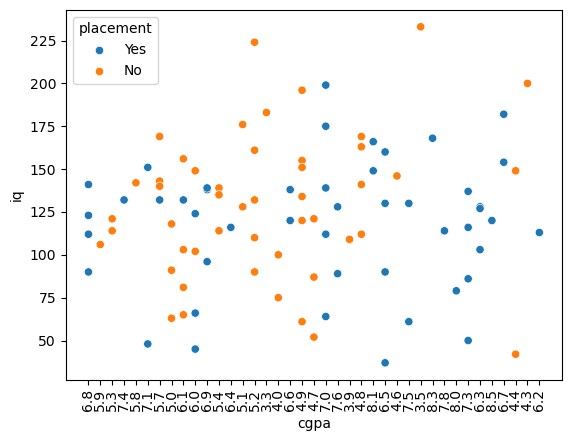

In [420]:
sns.scatterplot(x=df["cgpa"], y=df["iq"], hue=df.placement)
plt.xticks(rotation=90)
plt.show()

In [421]:
y = df.placement.map({'Yes': 1, 'No': 0})
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [422]:
X = df.iloc[:, 0:2]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

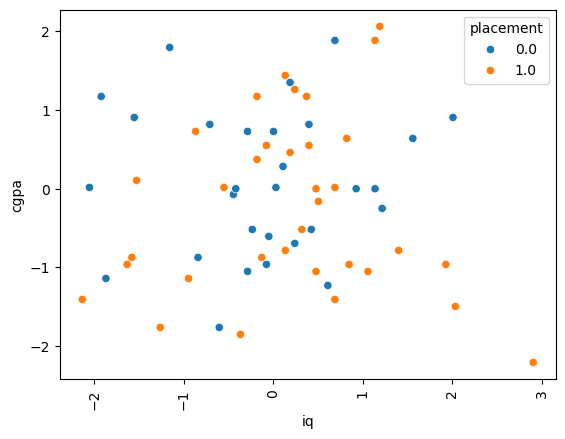

In [453]:
scaler = StandardScaler()
imputer = SimpleImputer()

imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
imputed_X_test = pd.DataFrame(imputer.transform(X_test), columns = X_test.columns)

scale_imputed_X_train = pd.DataFrame(scaler.fit_transform(imputed_X_train), columns = imputed_X_train.columns)
scale_imputed_X_test = pd.DataFrame(scaler.transform(imputed_X_test), columns = imputed_X_test.columns)

X_train = scale_imputed_X_train
X_test = scale_imputed_X_test

# scatt
sns.scatterplot(x=X_train.iq, y=X_train.cgpa, hue=y_train)
plt.xticks(rotation=90)
plt.show()


In [425]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [426]:
y_test

92    0
9     0
14    0
98    1
52    1
16    0
5     1
17    0
75    0
28    0
36    0
38    1
69    1
32    1
8     0
46    0
82    1
6     0
42    1
47    0
Name: placement, dtype: int64

In [427]:
accuracy_score(y_test, pred)

0.9

In [428]:
X_train.values

array([[ 1.43856658e+00,  1.35862980e-01],
       [ 7.89475513e-16,  9.27297813e-01],
       [ 7.27470254e-01, -2.86235598e-01],
       [-1.49470576e+00,  2.03530658e+00],
       [ 2.83035051e-01,  1.09481819e-01],
       [-2.50287194e-01,  2.41387624e-01],
       [ 1.63739286e-02, -1.49976901e+00],
       [ 9.05244336e-01, -1.55253133e+00],
       [ 7.27470254e-01,  4.78818074e-01],
       [ 1.17190546e+00, -9.72145787e-01],
       [ 2.06077586e+00,  1.19110942e+00],
       [-8.72496478e-01, -1.57891249e+00],
       [-8.72496478e-01, -8.40239981e-01],
       [ 1.26079250e+00,  2.41387624e-01],
       [ 9.05244336e-01, -2.86235598e-01],
       [ 8.16357295e-01,  3.99674591e-01],
       [ 8.16357295e-01,  4.26055752e-01],
       [ 4.60809132e-01, -8.66621142e-01],
       [ 1.63739286e-02, -2.05377339e+00],
       [-5.16948316e-01, -2.33473276e-01],
       [-1.76136689e+00, -1.26233856e+00],
       [-1.61400153e-01,  5.05199235e-01],
       [ 1.79411474e+00, -1.15681391e+00],
       [-2.

C:\Users\12368\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

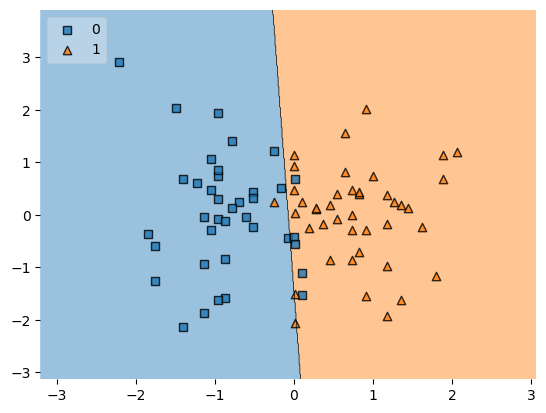

In [429]:
plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2)

In [447]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))